# Info
Name:  

    KORUS_AOD_comp

Purpose:  

    Comparison of AOD from 4STAR along flight track and GOCI aerosol
    Additional calculations of the aerosol extinction profile
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - load_utils.py : for loading OMI HDF5 files
    - matplotlib
    - numpy
    - scipy : for saving and reading
    - pytables
    - os
    - datetime
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - ...
  
Modification History:

    Written: Samuel LeBlanc, OSAN AFB, Korea, 2016-05-06
    Modified: 

# Import the required modules and set up base

In [44]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import scipy.io as sio
import Sp_parameters as Sp
import load_utils as lm
import os
from datetime import datetime

In [45]:
import hdf5storage as hs
import tables

In [46]:
from mpl_toolkits.basemap import Basemap,cm
%matplotlib notebook
fp = 'C:/Users/sleblan2/Research/KORUS-AQ/'

In [178]:
daystr = '20160503'
daystr_goci = '20160504'

# Load the various data

## Load the 4STAR starsun

In [179]:
f_star = fp+'data\\{}starsun.mat'.format(daystr)

In [180]:
try:
    s = sio.loadmat(f_star+'_small.mat')
except IOError:
    s = sio.loadmat(f_star)
except NotImplementedError:
    s = hs.loadmat(f_star+'_small.mat')

In [181]:
s.keys()

[u'Lon', u'tau_aero', u'm_aero', u't', u'w', u'Lat', u'Alt']

In [182]:
s['utc'] = lm.toutc(lm.mat2py_time(s['t']))

In [183]:
s['tau_aero'].shape

(30858L, 1556L)

### Load the starflag for this day

In [184]:
f_info = 'C:\Users\sleblan2\Research\\4STAR_codes\data_folder\\'

In [185]:
finf = f_info+'starinfo_{}.m'.format(daystr)

In [186]:
with open(finf, 'r') as inF:
    for line in inF:
        if 'flagfilename' in line:
            f_flag = line[line.find("'")+1:line.rfind("'")]
            break

In [187]:
f_flag

'20160503_starflag_man_created20160509_0026by_MS.mat'

In [188]:
sflag = sio.loadmat(f_info+f_flag)

In [189]:
flag = sflag['manual_flags']['screen'][0][0][:,0]

In [190]:
flag.shape

(30858L,)

### Apply the flags to 4star data

In [191]:
s['tau_aero'][flag==1,:]=np.nan

## Load the GOCI aerosol products

In [192]:
fp_goci = fp+'sat/GOCI//{}/'.format(daystr_goci)

In [193]:
fpl = os.listdir(fp_goci)

In [194]:
gg = []
gg_head = []
for f in fpl:
    f_goci = fp_goci+f
    gt,gth = lm.load_hdf(f_goci,values=(('lon',0),('lat',1),('aod550',2),('fmf550',3),('ssa440',4),('type',5),('ang',6),('QA',7),
                                ('obs_time',8),('cf',9),('turbidI',10),('Land_sea_mask',11)),verbose=False)
    gt['year'] = int(f.split('_')[-1].split('.')[0][0:4])
    gt['month'] = int(f.split('_')[-1].split('.')[0][4:6])
    gt['day'] = int(f.split('_')[-1].split('.')[0][6:8])
    gt['hour'] = int(f.split('_')[-1].split('.')[0][8:10])
    gt['minute'] = int(f.split('_')[-1].split('.')[0][10:12])
    gt['seconds'] = int(f.split('_')[-1].split('.')[0][12:14])
    gt['julian'] = float(datetime(gt['year'],gt['month'],gt['day'],gt['hour'],gt['minute'],
                                  gt['seconds']).timetuple().tm_yday)+gt['hour']/24.0+gt['minute']/60.0/24.0+gt['seconds']/3600.0/24.0
    
    gt['aod550_QA'] = gt['aod550']
    gt['aod550_QA'][gt['QA']==3] = np.nan
    gg.append(gt)
    gg_head.append(gth)

*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace 

In [195]:
gt['aod550'].shape

(473L, 463L)

In [196]:
gt['QA'].shape

(473L, 463L)

In [153]:
gt.keys()

['obs_time',
 'ang',
 'hour',
 'aod550',
 'julian',
 'year',
 'lon',
 'cf',
 'month',
 'QA',
 'turbidI',
 'minute',
 'seconds',
 'Land_sea_mask',
 'lat',
 'aod550_QA',
 'ssa440',
 'type',
 'fmf550',
 'day']

In [222]:
gth.keys()

['obs_time',
 'ang',
 'aod550',
 'lon',
 'cf',
 'QA',
 'turbidI',
 'Land_sea_mask',
 'lat',
 'ssa440',
 'type',
 'fmf550']

In [224]:
gth['aod550']

{'_FillValue': '1.#QNAN',
 'add_offset': '0',
 'scale_factor': '1',
 'valid_range': '-1, 5'}

In [197]:
len(gg)

8

In [198]:
fpl

['GOCI_YAER_AOP_20160504001641.hdf',
 'GOCI_YAER_AOP_20160504011641.hdf',
 'GOCI_YAER_AOP_20160504021641.hdf',
 'GOCI_YAER_AOP_20160504031641.hdf',
 'GOCI_YAER_AOP_20160504041641.hdf',
 'GOCI_YAER_AOP_20160504051641.hdf',
 'GOCI_YAER_AOP_20160504061641.hdf',
 'GOCI_YAER_AOP_20160504071641.hdf']

In [138]:
gg[4]['julian']

134.1782638888889

## Get the AERONET data to overlay on plot

In [139]:
fp

'C:/Users/sleblan2/Research/KORUS-AQ/'

In [140]:
reload(lm)

<module 'load_utils' from 'load_utils.pyc'>

In [141]:
fa = fp+'aeronet/AOT/LEV10/ALL_POINTS/'

In [142]:
aero = lm.load_multi_aeronet(fa)

Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Anmyon.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_AOE_Baotou.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Baengnyeong.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Beijing-CAMS.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Beijing.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Beijing_RADI.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Chiba_University.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Fukuoka.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Gangneung_WNU.lev10
Openin

In [143]:
ilatest = lm.aeronet_subset(aero)

<IPython.core.display.Javascript object>


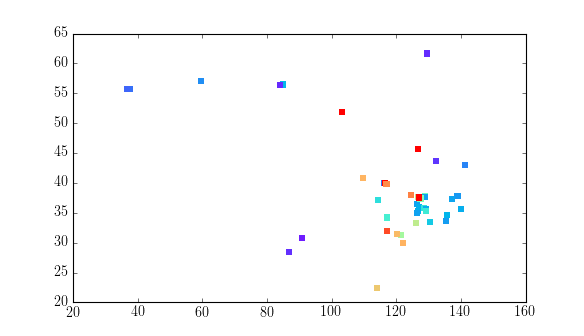

In [144]:
plt.figure()
plt.scatter(aero['long'],aero['lat'],c=aero['AOT_500'][ilatest],
            cmap=plt.cm.rainbow,marker='s',vmin=0.0,vmax=1.5,edgecolors='None',s=30)


<IPython.core.display.Javascript object>


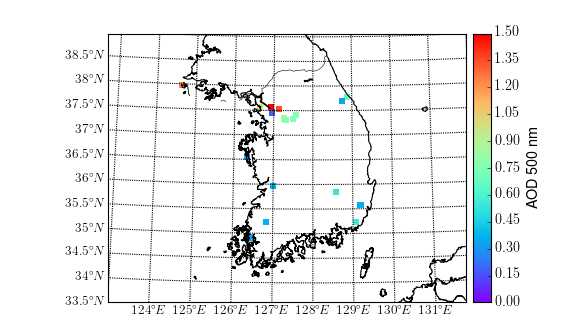

In [145]:
plt.figure()
m = Basemap(projection='stere',lon_0=128,lat_0=36.0,
            llcrnrlon=123.0, llcrnrlat=33.5,
            urcrnrlon=132.0, urcrnrlat=39,resolution='h')
m.drawcoastlines()
    #m.fillcontinents(color='#AAAAAA')
m.drawstates()
m.drawcountries()
m.drawmeridians(np.linspace(123,133,11),labels=[0,0,0,1])
m.drawparallels(np.linspace(33,39,13),labels=[1,0,0,0])
x,y = m(aero['long'],aero['lat'])
bb = m.scatter(x,y,c=aero['AOT_500'][ilatest],
            cmap=plt.cm.rainbow,marker='s',vmin=0.0,vmax=1.5,edgecolors='None',s=30)
cbar = m.colorbar(bb)
cbar.set_label('AOD 500 nm')

## Subset the aeronet and 4STAR values to GOCI values

In [199]:
utcs = []
iaero = []
istar = []
istar_steps = []
dz = 500.0
for i in range(len(gg)):
    utcs.append((gg[i]['julian']-np.floor(gg[i]['julian']))*24.0)
    iaero.append(lm.aeronet_subset(aero,julian=gg[i]['julian'],window=1.0))
    istar.append(((s['utc']-24.0)<utcs[i])&(s['Alt'][:,0]<dz))
    if i >0:
        istar_steps.append(((s['utc']-24.0)<utcs[i])&(s['Alt'][:,0]<dz)&((s['utc']-24.0)>utcs[i-1]))
    else:
        istar_steps.append(((s['utc']-24.0)<utcs[i])&(s['Alt'][:,0]<dz))

In [200]:
utcs

[0.2780555555553974,
 1.2780555555555111,
 2.2780555555552837,
 3.2780555555553974,
 4.2780555555555111,
 5.2780555555552837,
 6.2780555555553974,
 7.2780555555555111]

In [201]:
for i,u in enumerate(utcs):
    print istar[i].sum()

2814
3871
4453
4540
4545
5018
5018
5227


# Start making different plots/maps

In [202]:
#set up a easy plotting function
def make_map(ax=plt.gca()):
    m = Basemap(projection='stere',lon_0=128,lat_0=36.0,
            llcrnrlon=123.0, llcrnrlat=33.5,
            urcrnrlon=132.0, urcrnrlat=39,resolution='h',ax=ax)
    m.drawcoastlines()
    #m.fillcontinents(color='#AAAAAA')
    m.drawstates()
    m.drawcountries()
    m.drawmeridians(np.linspace(123,133,11),labels=[0,0,0,1])
    m.drawparallels(np.linspace(33,39,13),labels=[1,0,0,0])
    return m

## Start with simple map plot of GOCI

<IPython.core.display.Javascript object>


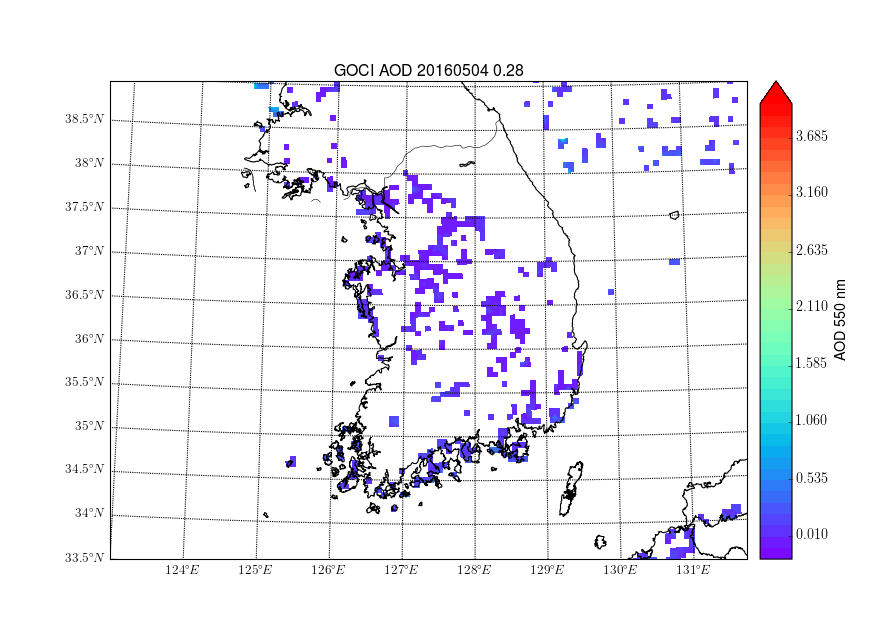

In [225]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = make_map(ax)
x,y = m(gg[0]['lon'],gg[0]['lat'])
clevels = np.linspace(-0.2,0.6,41)

plt.title('GOCI AOD {} {:5.2f}'.format(daystr_goci,utcs[0]))
cs1 = m.contourf(x,y,gg[0]['aod550'],clevels,cmap=plt.cm.rainbow,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('AOD 550 nm')

#xx,yy = m(star['lon'],star['lat'])
#m.scatter(xx,yy,c=star['tau'],cmap=plt.cm.rainbow,marker='o',vmin=clevels[0],vmax=clevels[-1],
#          alpha=0.5,edgecolors='k',linewidth=0.65)
plt.savefig(fp+'plot/{}_GOCI_map_AOD.png'.format(daystr_goci),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


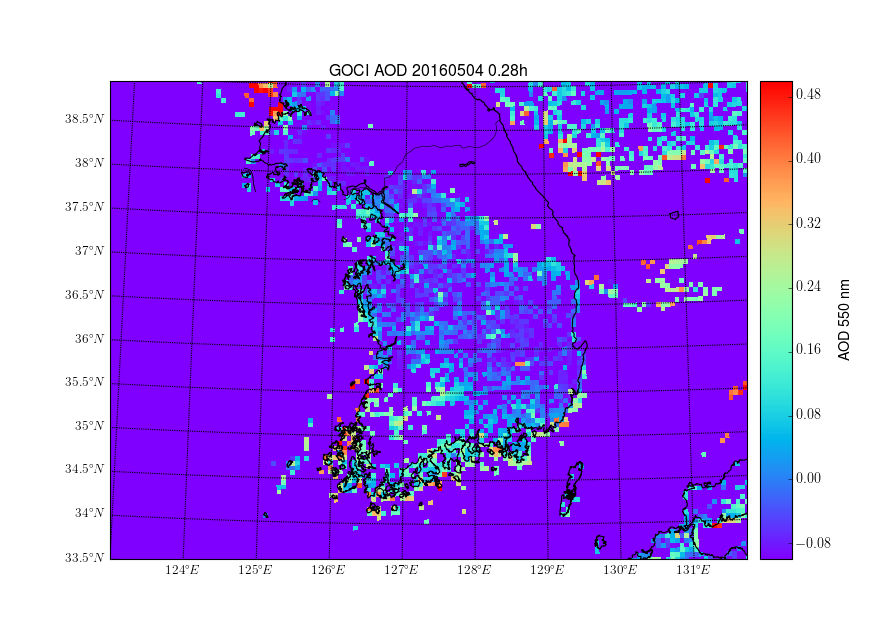

In [228]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = make_map(ax)
x,y = m(gg[0]['lon'],gg[0]['lat'])
clevels = np.linspace(0,4,41)

plt.title('GOCI AOD {} {:5.2f}h'.format(daystr_goci,utcs[0]))
cs1 = ax.pcolorfast(x,y,gg[0]['aod550'][:-1,:-1],cmap=plt.cm.rainbow,vmin=-0.1,vmax=0.5)
cbar = m.colorbar(cs1)
cbar.set_label('AOD 550 nm')
plt.savefig(fp+'plot/{}_GOCI_map_AOD.png'.format(daystr_goci),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


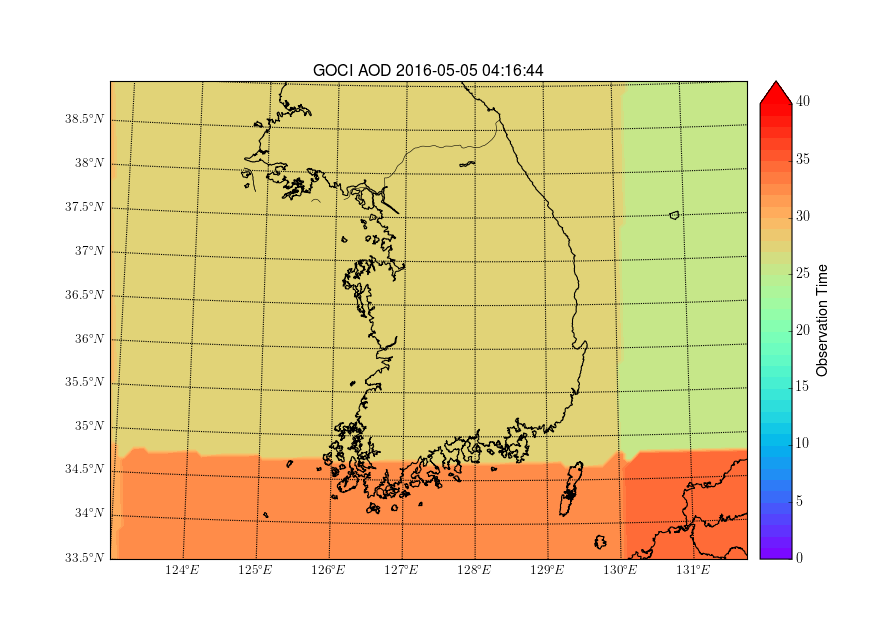

In [56]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = make_map(ax)
x,y = m(gg['lon'],gg['lat'])
clevels = np.linspace(0,40,41)

plt.title('GOCI AOD 2016-05-05 04:16:44')
cs1 = m.contourf(x,y,gg['obs_time'],clevels,cmap=plt.cm.rainbow,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('Observation Time')


<IPython.core.display.Javascript object>


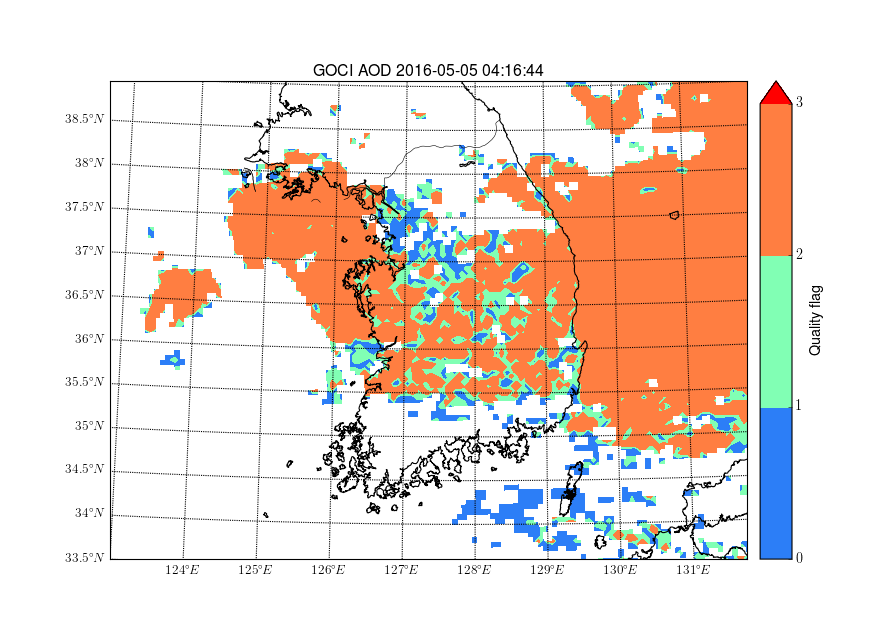

In [59]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = make_map(ax)
x,y = m(gg['lon'],gg['lat'])
clevels = np.linspace(0,3,4)

plt.title('GOCI AOD 2016-05-05 04:16:44')
cs1 = m.contourf(x,y,gg['QA'],clevels,cmap=plt.cm.rainbow,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('Quality flag')

## Overlay 4STAR values

<IPython.core.display.Javascript object>


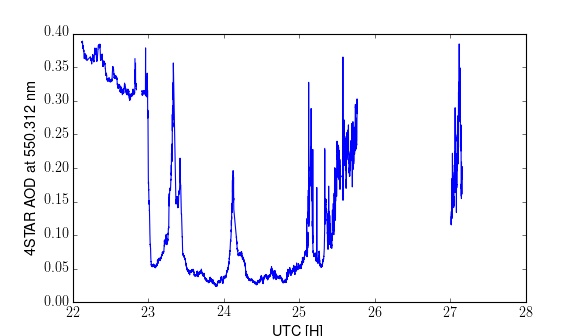

In [36]:
plt.figure()
plt.plot(s['utc'],s['tau_aero'][:,450])
plt.ylabel('4STAR AOD at {} nm'.format(s['w'][0][469]*1000.0))
plt.xlabel('UTC [H]')

In [61]:
ig = gg['QA']==3

In [62]:
ig.shape

(473L, 463L)

In [63]:
gg['aod550'].shape

(473L, 463L)

In [64]:
gg['aod550'][ig]=np.nan

<IPython.core.display.Javascript object>


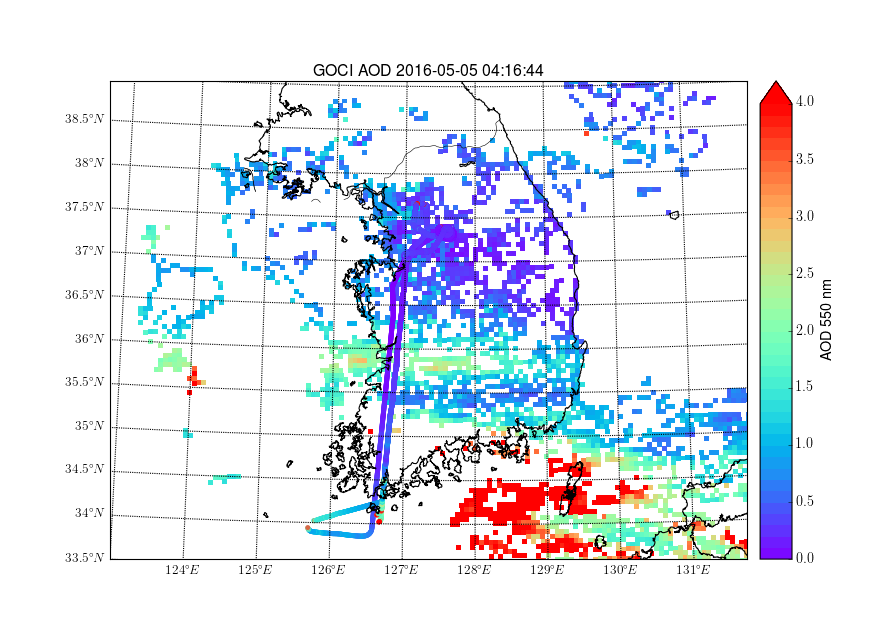

In [67]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = make_map(ax)
x,y = m(gg['lon'],gg['lat'])
clevels = np.linspace(0,4,41)

plt.title('GOCI AOD 2016-05-05 04:16:44')
cs1 = m.contourf(x,y,gg['aod550'],clevels,cmap=plt.cm.rainbow,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('AOD 550 nm')
m.scatter(x,y,c=gg['aod550'],cmap=plt.cm.rainbow,marker='s',vmin=clevels[0],vmax=clevels[-1],edgecolors='None')


xx,yy = m(s['Lon'],s['Lat'])
m.scatter(xx,yy,c=s['tau_aero'][:,469],cmap=plt.cm.rainbow,marker='o',vmin=clevels[0],vmax=clevels[-1],
          alpha=0.5,edgecolors='None')
plt.savefig(fp+'plot/20160505_GOCI_4STAR_map_AOD.png',dpi=600,transparent=True)

## Overlay Aeronet AOD

In [37]:
fp

'C:/Users/sleblan2/Research/KORUS-AQ/'

<IPython.core.display.Javascript object>


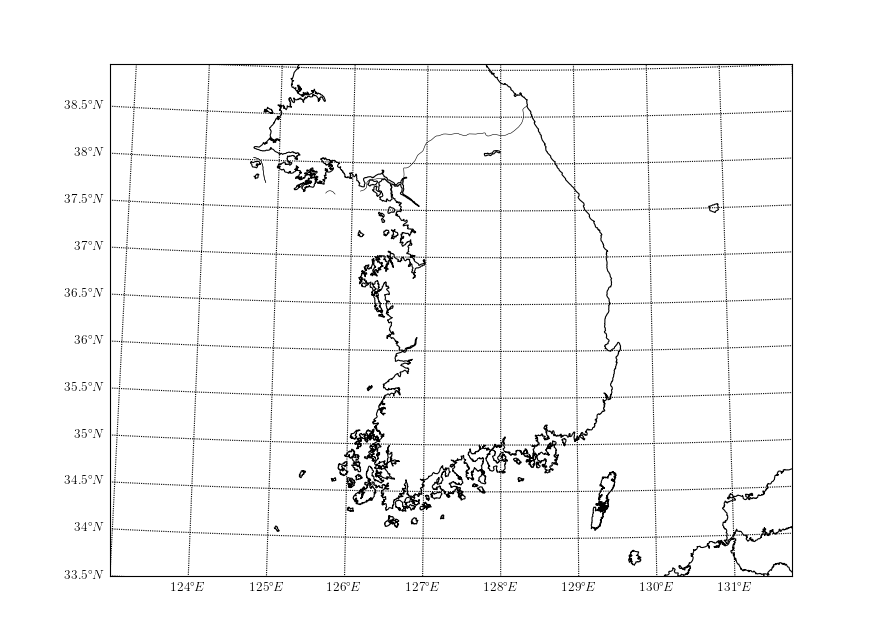

TypeError: list indices must be integers, not str

In [38]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = make_map(ax)
x,y = m(gg['lon'],gg['lat'])
clevels = np.linspace(0,4,41)

plt.title('GOCI AOD 2016-05-05 04:16:44')
cs1 = m.contourf(x,y,gg['aod550'],clevels,cmap=plt.cm.rainbow,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('AOD 550 nm')
m.scatter(x,y,c=gg['aod550'],cmap=plt.cm.rainbow,marker='s',vmin=clevels[0],vmax=clevels[-1],edgecolors='None')


xx,yy = m(s['Lon'],s['Lat'])
m.scatter(xx,yy,c=s['tau_aero'][:,469],cmap=plt.cm.rainbow,marker='o',vmin=clevels[0],vmax=clevels[-1],
          alpha=0.5,edgecolors='None')

xa,ya = m(anet['long'],anet['lat'])
m.scatter(xa,ya,c=anet['AOT_500'][il],cmap=plt.cm.rainbow,marker='s',vmin=clevels[0],vmax=clevels[-1],
          alpha=1.0,edgecolors='m',s=40,linewidth=2)

#plt.savefig(fp+'plot/20160505_GOCI_4STAR_map_AOD.png',dpi=600,transparent=True)

## Make a GOCI figure with overlays for every time

In [151]:
import scipy.ndimage as snim

In [206]:
istar[i][0]

True

<IPython.core.display.Javascript object>


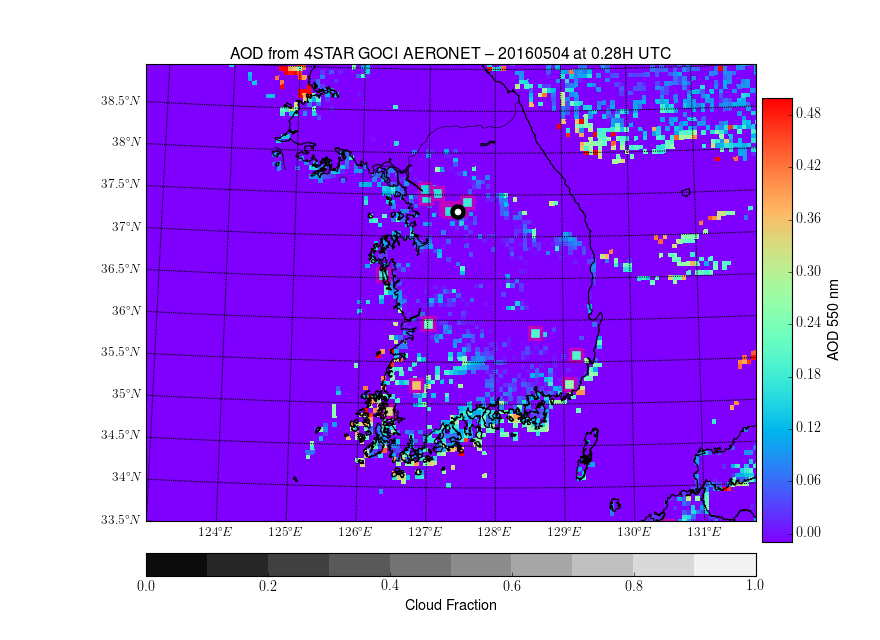

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\ipykernel\__main__.py:25: DeprecationWarning: using a boolean instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


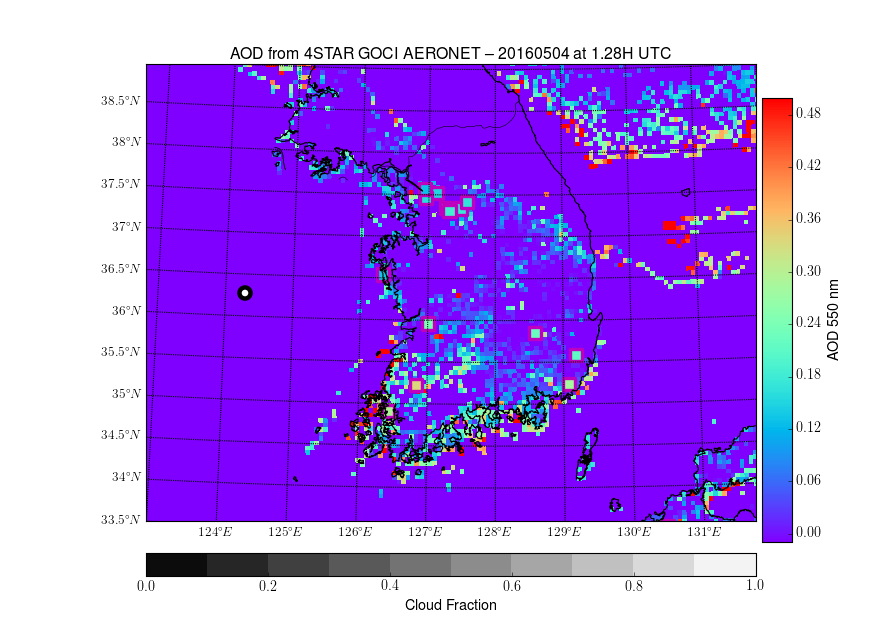

<IPython.core.display.Javascript object>


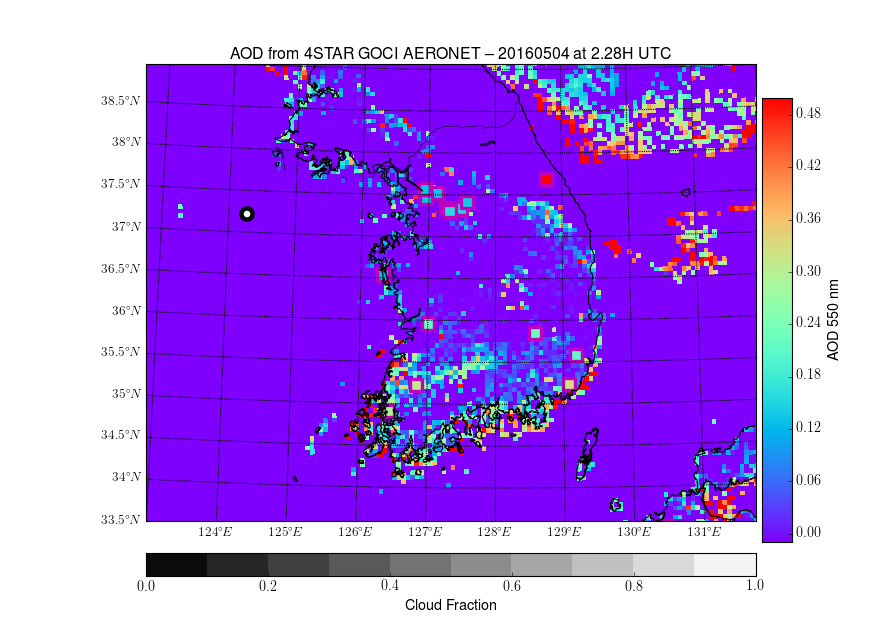

<IPython.core.display.Javascript object>


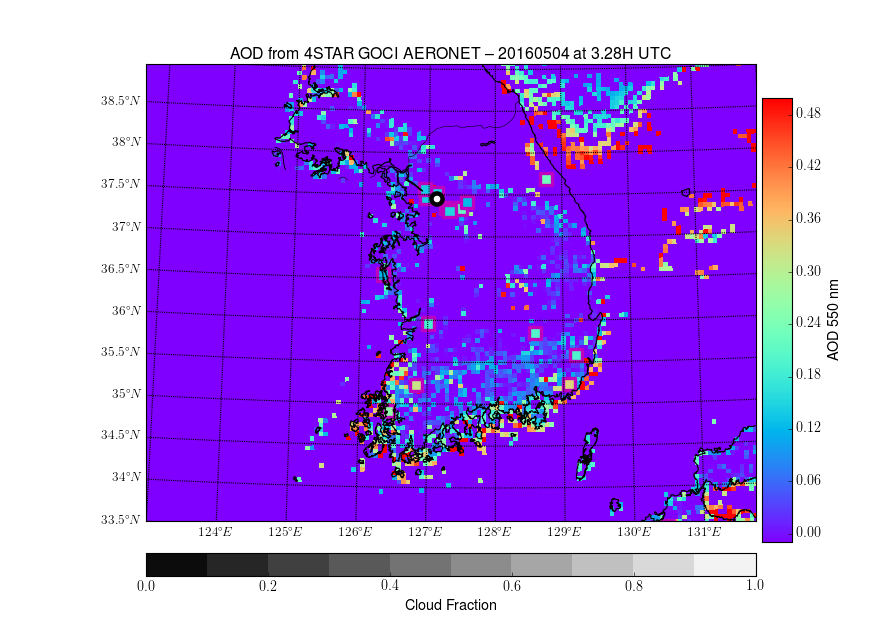

<IPython.core.display.Javascript object>


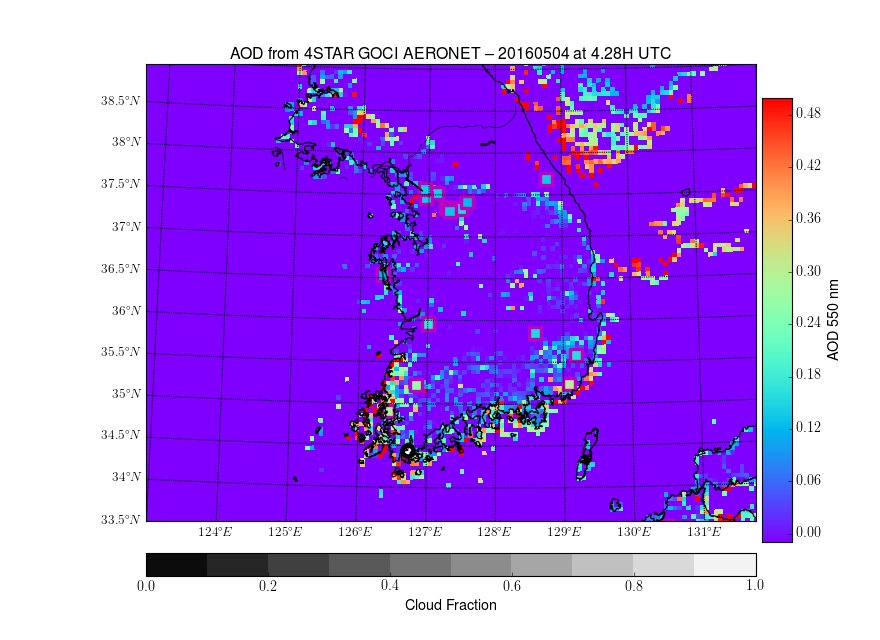

<IPython.core.display.Javascript object>


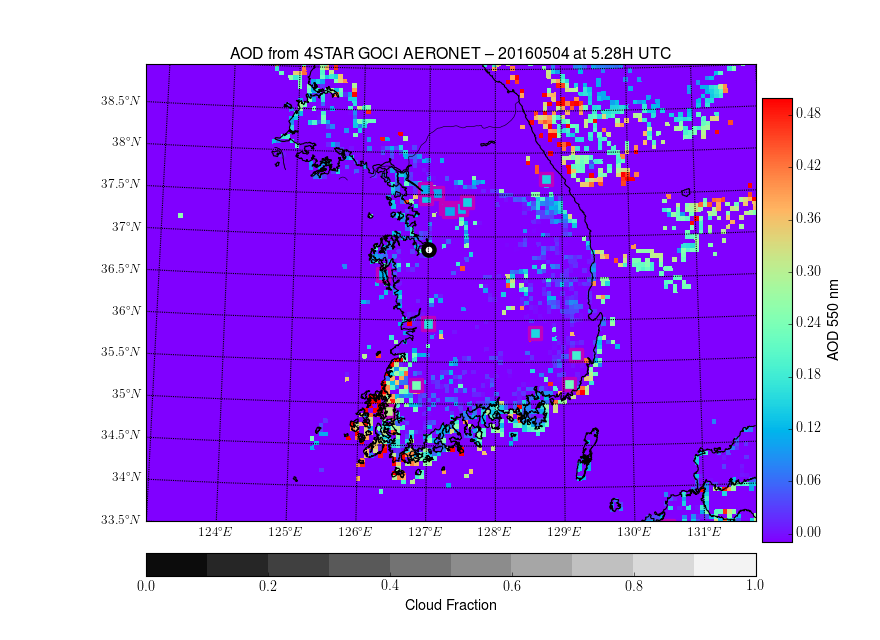

<IPython.core.display.Javascript object>


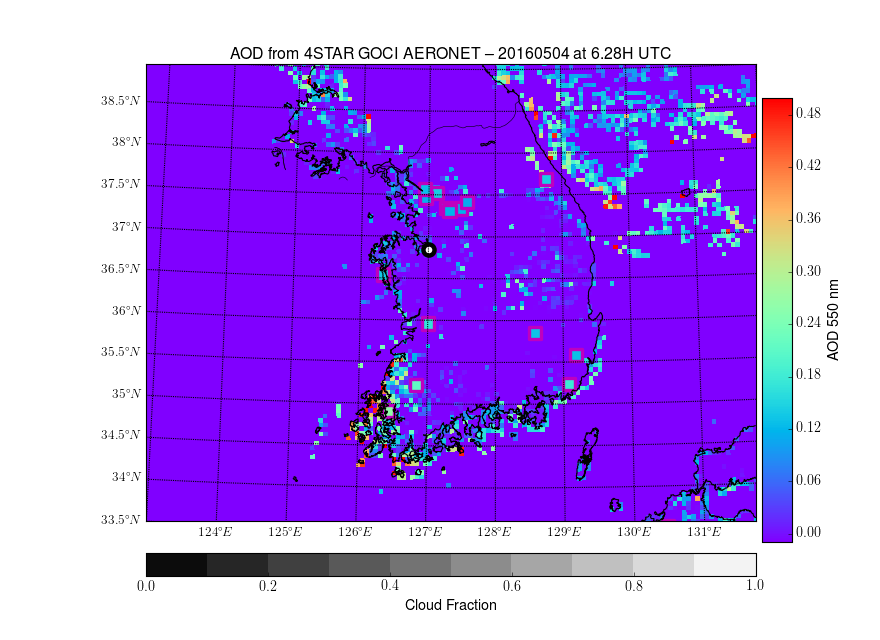

<IPython.core.display.Javascript object>


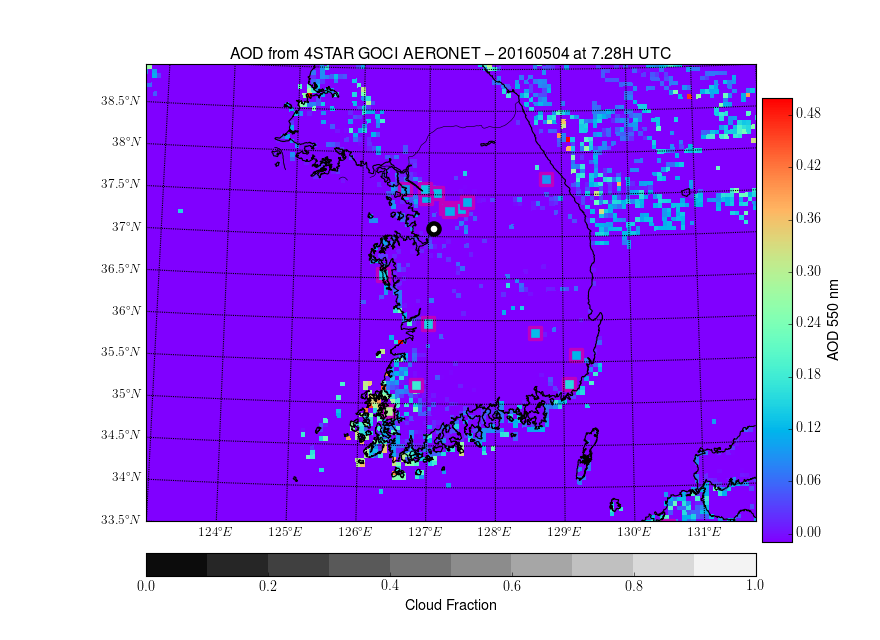

In [235]:
for i,u in enumerate(utcs):
    fig,ax = plt.subplots(1,1,figsize=(11,8))
    m = make_map(ax)
    x,y = m(gg[0]['lon'],gg[0]['lat'])
    clevels = np.linspace(-0.01,0.5,35)

    plt.title('AOD from 4STAR GOCI AERONET -- {} at {:5.2f}H UTC'.format(daystr_goci,u))
    cs2 = m.contourf(x,y,gg[i]['cf'],levels=np.linspace(0.0,1.0,11),cmap=plt.cm.gist_gray)
    ga = snim.zoom(gg[i]['aod550'],5)
    xz = snim.zoom(x,5)
    yz = snim.zoom(y,5)
    cs1 = ax.pcolorfast(x,y,gg[i]['aod550'][:-1,:-1],cmap=plt.cm.rainbow,vmin=clevels[0],vmax=clevels[-1])
    cbar = m.colorbar(cs1,pad='10%')
    cbar.set_label('AOD 550 nm')
    cbar2 = m.colorbar(cs2,pad='7%',location='bottom')
    cbar2.set_label('Cloud Fraction ')
    #m.scatter(x,y,c=gg[i]['aod550'],cmap=plt.cm.rainbow,marker='s',vmin=clevels[0],vmax=clevels[-1],edgecolors='None')
    
    xa,ya = m(aero['long'],aero['lat'])
    m.scatter(xa,ya,c=aero['AOT_500'][iaero[i]],cmap=plt.cm.rainbow,marker='s',vmin=clevels[0],vmax=clevels[-1],
              alpha=1.0,edgecolors='m',s=np.zeros_like(xa)+120,linewidth=3)
    
    xx,yy = m(s['Lon'][istar[i]],s['Lat'][istar[i]])
    m.scatter(xx,yy,c=s['tau_aero'][istar[i],469],cmap=plt.cm.rainbow,marker='o',vmin=clevels[0],vmax=clevels[-1],
              alpha=0.5,edgecolors='k',linewidth=0.1,s=s['tau_aero'][istar[i][0],469]*20+40)
    m.scatter(xx[-1],yy[-1],c='w',edgecolor='k',linewidth=4,marker='o',alpha=1.0,s=100)
    #break
    plt.savefig(fp+'plot/{}_GOCI_4STAR_map_AOD_{:4.2f}h.png'.format(daystr,u),dpi=600,transparent=True)

In [236]:
ga.shape

(2365L, 2315L)

In [237]:
x.shape

(473L, 463L)

In [238]:
y.shape

(473L, 463L)

# Get the GOCI values along the flight path

In [239]:
import map_utils as mu

In [240]:
goci_ind = mu.map_ind(gg[0]['lon'],gg[0]['lat'],s['Lon'],s['Lat'])

Running through flight track: [########################################]100% -- Done! 


In [241]:
print goci_ind.shape
print s['Lon'].shape
print gg[0]['lon'].shape

(2L, 30858L)
(30858L, 1L)
(473L, 463L)


## Plot the GOCI vs. 4STAR AOD values

<IPython.core.display.Javascript object>


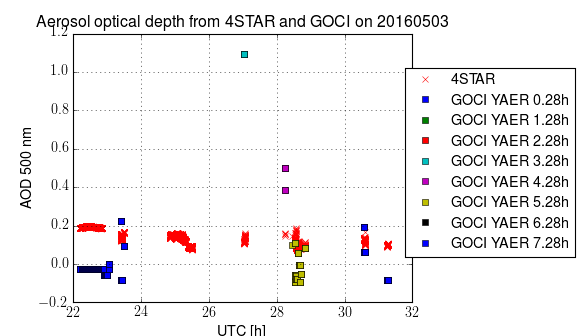

In [242]:
plt.figure()
plt.plot(s['utc'][istar[-1]],s['tau_aero'][istar[-1],463],'xr',label='4STAR')
goci_aod = []
for i,u in enumerate(utcs):
    plt.plot(s['utc'][istar_steps[i]],gg[i]['aod550_QA'][goci_ind[0,istar_steps[i]],goci_ind[1,istar_steps[i]]],'s',
             label='GOCI YAER {:5.2f}h'.format(u))
    goci_aod.append(gg[i]['aod550_QA'][goci_ind[0,istar_steps[i]],goci_ind[1,istar_steps[i]]])
plt.xlabel('UTC [h]')
plt.ylabel('AOD 500 nm')
plt.title('Aerosol optical depth from 4STAR and GOCI on {}'.format(daystr))
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.75, box.height])
plt.grid()
plt.legend(frameon=True,numpoints=1,bbox_to_anchor=(1.5,0.9))
plt.savefig(fp+'plot/{}_GOCI_4STAR_utc_AOD.png'.format(daystr),dpi=600,transparent=True)

In [243]:
gaod = np.concatenate(goci_aod).flatten()

In [244]:
bins = np.linspace(0,0.5,31)

<IPython.core.display.Javascript object>


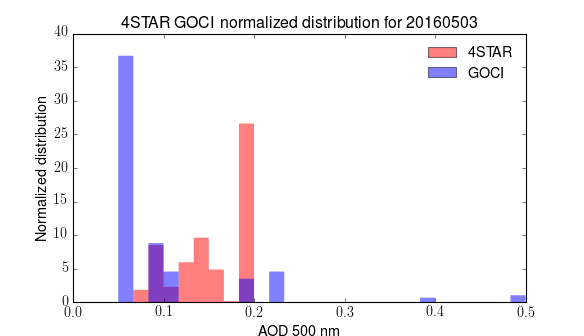

In [245]:
plt.figure()
plt.hist(s['tau_aero'][istar[-1],463],bins=bins,histtype='stepfilled',normed=True,alpha=0.5,color='r',label='4STAR',edgecolor='None')
plt.hist(gaod,bins=bins,histtype='stepfilled',normed=True,alpha=0.5,color='b',label='GOCI',edgecolor='None')
plt.legend(frameon=False)
plt.xlabel('AOD 500 nm')
plt.ylabel('Normalized distribution')
plt.title('4STAR GOCI normalized distribution for {}'.format(daystr))
plt.savefig(fp+'plot/{}_GOCI_4STAR_AOD_hist.png'.format(daystr),dpi=600,transparent=True)

# Save the comparison data to a file

In [136]:
import hdf5storage as hs

In [137]:
dict_out = {u's':s,u'istar':istar,u'istar_steps':istar_steps,
            u'goci':gg,u'utcs':utcs,u'goci_ind':goci_ind,u'gaod':gaod,
            u'aero':aero,u'iaero':iaero}

In [ ]:
import cPickle as pickle
pickle.dump(dict_out,open(fp+'{}_GOCI_Aeronet_4STAR.p'.format(daystr),"wb"))

In [138]:
hs.savemat(fp+'{}_GOCI_Aeronet_4STAR.mat',dict_out)

NotImplementedError: Dictionaries with non-unicode keys are not supported: 'Str'